To Do:
- Add MS data for post plasma result, double check if signal is purely CO2

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [15]:
# Define the alpha value for the post-plasma materials
alpha = 0.65

# Define the color for each material
cb_colors = {
    'γ-Al₂O₃': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃': (213/255, 94/255, 0/255),

    'γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% CuO@γ-Al₂O₃ pre-plasma': (
        (86 * alpha + 255 * (1 - alpha)) / 255,
        (180 * alpha + 255 * (1 - alpha)) / 255,
        (233 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃\npre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (230 * alpha + 255 * (1 - alpha)) / 255,
        (159 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (213 * alpha + 255 * (1 - alpha)) / 255,
        (94 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    'γ-Al₂O₃ post-plasma': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃ post-plasma': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃ post-plasma': (0/255, 114/255, 178/255),
    '10% CuO@γ-Al₂O₃\npost-plasma': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma': (213/255, 94/255, 0/255)
}

# determine order of materials for plotting
material_order = [
    'γ-Al₂O₃',
    '2% CuO@γ-Al₂O₃',
    '2% Fe₂O₃@γ-Al₂O₃',
    '10% CuO@γ-Al₂O₃',
    '10% Fe₂O₃@γ-Al₂O₃',
    'γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

In [16]:
# Define the path to the Excel file
excel_file_path = (
    r'N:\FWET\FDCH\AdsCatal\General\personal_work_folders\plasmacatdesign'
    r'\materials\ugent\ugent-tpd-co2.xlsx'
)

# Read all worksheets in the Excel file into a dictionary of DataFrames
data = pd.read_excel(
    io=excel_file_path,
    sheet_name=['co2_tpd', 'co2_tpd_fitting', 'uptake', 'notes']
)

# Assign each DataFrame to a separate variable
co2_tpd_data = data['co2_tpd']
co2_tpd_fitting_data = data['co2_tpd_fitting']
uptake_data = data['uptake']
notes_data = data['notes']

In [17]:
co2_tpd_data.head()

,material,plasma,date,mass_sample_g,time_s,temp_furn_degC,tcd_perc,surface_area_sqrmpg
0,γ-Al₂O₃,pre-plasma,2023-02-13,0.0813,0.0,100.0429,0.006684,222.0
1,γ-Al₂O₃,pre-plasma,2023-02-13,0.0813,10.0,100.0322,-0.009656,222.0
2,γ-Al₂O₃,pre-plasma,2023-02-13,0.0813,20.0,100.0433,-0.009182,222.0
3,γ-Al₂O₃,pre-plasma,2023-02-13,0.0813,30.0,100.0311,-0.010986,222.0
4,γ-Al₂O₃,pre-plasma,2023-02-13,0.0813,40.0,100.0308,-0.030828,222.0


In [19]:
# The materials of interest
materials_of_interest = [
    'γ-Al₂O₃',
    '2% CuO@γ-Al₂O₃',
    '2% Fe₂O₃@γ-Al₂O₃',
    '10% CuO@γ-Al₂O₃',
    '10% Fe₂O₃@γ-Al₂O₃'
]

# Subset the materials of interest
co2_tpd_subset = co2_tpd_data[
    co2_tpd_data['material'].isin(materials_of_interest)
].copy()

# Subset the most recent measurement for each material
co2_tpd_subset['max_date'] = co2_tpd_subset.groupby(
    ['material', 'plasma']
)['date'].transform("max")

co2_tpd_subset = co2_tpd_subset[
    co2_tpd_subset['date'] == co2_tpd_subset['max_date']
]

co2_tpd_subset = co2_tpd_subset.drop(columns=['max_date'])

# Divide normalize tcd_perc variable
co2_tpd_subset['tcd_perc_normalized'] = (
    co2_tpd_subset['tcd_perc'] / (
        co2_tpd_subset['mass_sample_g'] * co2_tpd_subset['surface_area_sqrmpg']
    )
)

# Group the data by material and plasma and calculate a rolling mean
co2_tpd_subset['tcd_perc_normalized_rolling_mean'] = (
    co2_tpd_subset
    .groupby(['material', 'plasma'])['tcd_perc_normalized']
    .transform(lambda x: x.rolling(window=15, center=True).mean())
)

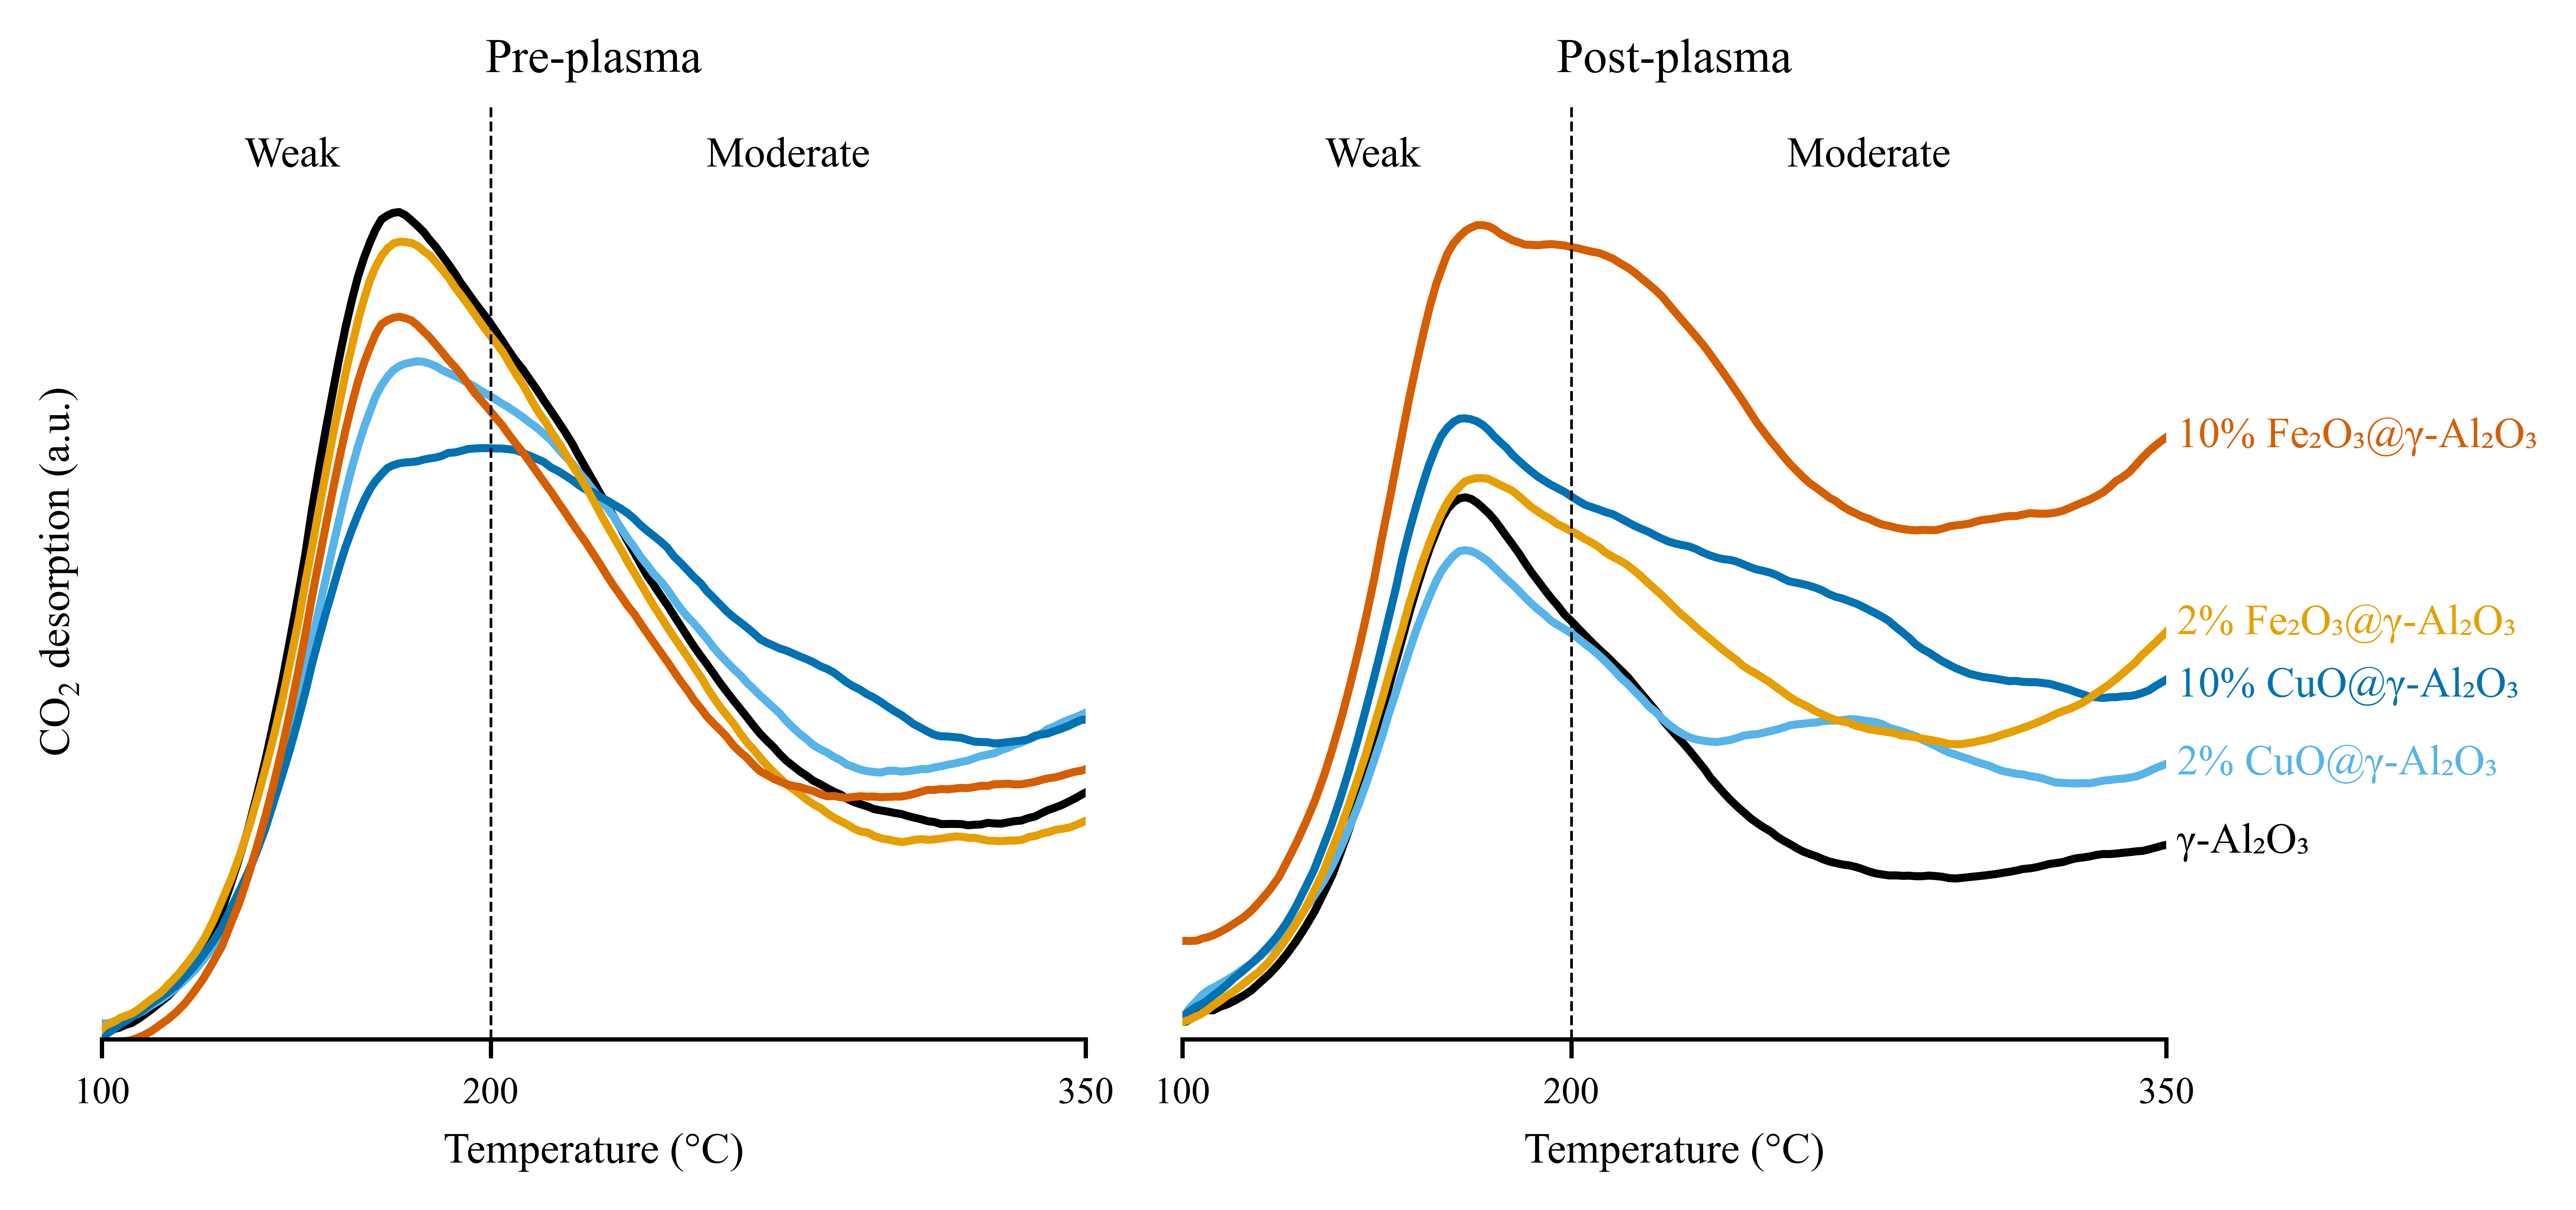

In [36]:
# Use Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.size'] = 7

# Set the size of the figure in inches (1 inch = 25.4 mm)
fig = plt.figure(
    figsize=(170/25.4, 80/25.4),
    dpi=1000
)

gs = gridspec.GridSpec(
    nrows=1,
    ncols=2,
    figure=fig
)

# Create the remaining four subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Despine ax1
sns.despine(
    ax=ax1,
    top=True, right=True, left=True, bottom=False
)

# Plot the pre-plasma tpd data
sns.lineplot(
    x='temp_furn_degC',
    y='tcd_perc_normalized_rolling_mean',
    hue='material',
    data=co2_tpd_subset[co2_tpd_subset['plasma'] == 'pre-plasma'],
    palette=cb_colors,
    ax=ax1,
    legend=False
)

# Set title for ax1
ax1.set_title('Pre-plasma', fontsize=9)

# ax1 x-axis settings
ax1.set_xlabel('Temperature (°C)', fontsize=8)
ax1.set_xlim(102, 350)
ax1.spines['bottom'].set_bounds(102, 350)
ax1.set_xticks(ticks=[102, 200, 350], labels=[100, 200, 350])

# ax1 y-axis settings
ax1.set_ylabel('CO$_2$ desorption (a.u.)', fontsize=8)
ax1.set_ylim(0, 0.15)
ax1.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False
)

# Despine ax2
sns.despine(
    ax=ax2,
    top=True, right=True, left=True, bottom=False
)

# Plot the post-plasma tpd data
sns.lineplot(
    x='temp_furn_degC',
    y='tcd_perc_normalized_rolling_mean',
    hue='material',
    data=co2_tpd_subset[co2_tpd_subset['plasma'] == 'post-plasma'],
    palette=cb_colors,
    ax=ax2,
    legend=False
)

# Set title for ax2
ax2.set_title('Post-plasma', fontsize=9)

# ax2 x-axis settings
ax2.set_xlabel('Temperature (°C)', fontsize=8)
ax2.set_xlim(ax1.get_xlim())
ax2.spines['bottom'].set_bounds(102, 350)
ax2.set_xticks(ticks=[102, 200, 350], labels=[100, 200, 350])

# ax2 y-axis settings
ax2.yaxis.set_visible(False)
ax2.set_ylim(ax1.get_ylim())

# Define the label points manually
label_points = {
    'γ-Al₂O₃': (350, 0.03),
    '2% CuO@γ-Al₂O₃': (350, 0.0425),
    '2% Fe₂O₃@γ-Al₂O₃': (350, 0.065),
    '10% CuO@γ-Al₂O₃': (350, 0.055),
    '10% Fe₂O₃@γ-Al₂O₃':  (350, 0.095)
}

# Loop through each item in label_points
# and add a text label with an offset
for material, (x, y) in label_points.items():
    ax2.annotate(
        text=material,
        xy=(x, y),
        xytext=(2,0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material]
    )

# Define the strength points manually
strength_points = {
    'Weak': (150, 0.14),
    'Moderate': (275, 0.14),
    #'Strong': (378, 30)
}

# Place labels on ax1
for strength, (x, y) in strength_points.items():
    ax1.annotate(
        text=strength,
        xy=(x, y),
        xytext=(0,0),
        textcoords='offset points',
        fontsize=8,
        color='black',
        horizontalalignment='center'
    )

# Place labels on ax2
for strength, (x, y) in strength_points.items():
    ax2.annotate(
        text=strength,
        xy=(x, y),
        xytext=(0,0),
        textcoords='offset points',
        fontsize=8,
        color='black',
        horizontalalignment='center'
    )

# Add vertical lines to indicate bonding strength on ax1
ax1.axvline(x=200, linestyle='--', color='black', linewidth=0.5)
#ax1.axvline(x=350, linestyle='--', color='black', linewidth=0.5)

# Add vertical lines to indicate bonding strength on ax2
ax2.axvline(x=200, linestyle='--', color='black', linewidth=0.5)
#ax2.axvline(x=350, linestyle='--', color='black', linewidth=0.5, ymax=24/30.5)

plt.tight_layout()
plt.savefig(
    fname=r'C:\Users\sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_co2_tpd.pdf'
)
plt.show()